## **CS577 Final Project** : A Data Science Analysis on Housing Market Trends and Influential Factors

#### **Authors**: Alexandre Makhmudyantsev, Brandon Nguyen, Ryan Martin Elli Cervantes, Triet Lieu

#### **Semester** : Fall 2023

-------------------

## **Requirements:**
There are four sections of the final project. You are expected to perform the following tasks within each section to fulfill the project requirements. 
1. #### **Data Importing and Pre-processing (25%)**
   - ✅ Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used 
   - ✅ Clean, wrangle, and handle missing data
   - Transform data appropriately using techniques such as aggregation, normalization, and feature construction
   - Reduce redundant data and perform need based discretization
   <br><br>
2. #### **Data Analysis and Visualization (25%)**
   - ✅ Identify categorical, ordinal, and numerical variables within data
   - Provide measures of centrality and distribution with visualizations
   - Diagnose for correlations between variables and determine independent and dependent variables
   - Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
   <br><br>
1. #### **Data Analytics (25%)**
   - Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
   - Train, test, and provide accuracy and evaluation metrics for model results
   <br><br>

2. #### **Presentation (25%)**
   - In a 5 to 10 minute presentation, briefly explain the project workflow from the code and results in your markdown notebook
   - State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

-------------------


###  **Table of Contents**
   1. [**Data Importing and Pre-processing**](#1-data-importing-and-pre-processing)
      - [**1.1 The Dataset**](main.ipynb#11-the-dataset)


      - [**1.2 Data Importing and Exploration**](##12-data-importing-and-exploration)


      - [**1.3 Data Cleaning**](#13-data-cleaning)

      - [**1.3 Data Cleaning**](#14-preliminary-model-linear-regression)

   2. [**Data Analysis, Transformation and Visualization**](#Data-Analysis-and-Visualization)
   3. [**Data Analytics**](#Data-Analytics)
   <br><br>

   -------------------

### **Necessary Packages**

In [153]:
# Necessary Imports
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

## **1. Data Importing and Pre-processing**
### **1.1 The Dataset**

The dataset chosen to create a model to predict the sale price of a home contains detailed insight into housing sales in King County for the years 2014 and 2015 and as originally found on Kaggle and is in the format of a CSV.

*Dataset Link:*
- https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion*


### **1.2 Data Importing and Exploration**

The dataset 21,613 entries, with each entry representing an individual home sale. Each of these sales is further described by 21 features, capturing diverse attributes of the respective homes. The table below provides a detailed breakdown of each feature, including its definition, data type, and additional notes when applicable. This comprehensive dataset will serve as a foundation to predict home prices within the county.

A preliminary data dictionary can be found below which defines summarizes each feature, its data type, and contains additional notes. The data dictionary was primarily created using Kaggle as a resource and verified through dataset exploration below.

*Resources used in helping to defining features:*
- https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885*
<br></br>


| Feature       | Definition                                                                                       | Data Type | Category    | Additional Notes                                             |
|---------------|--------------------------------------------------------------------------------------------------|-----------|-------------|-------------------------------------------------------------|
| id            | A unique identifier for each house.                                                              | Integer   | Nominal     |                                                             |
| date          | The date of when the house was sold.                                                             | ISO Datetime | Numerical |                                                             |
| price         | The price of what the house was sold at.                                                         | Float     | Numerical   | **Target Variable**                                          |
| bedrooms      | The number of bedrooms in the house.                                                             | Integer   | Numerical   |                                                             |
| bathrooms     | The number of bathrooms in the house.                                                            | Float     | Numerical   | Values are in quarter (0.25) increments                      |
| sqft_living   | The size of the house in square feet (ft<sup>2</sup>).                                           | Integer   | Numerical   |                                                             |
| sqft_lot      | The size of the property in square feet (ft<sup>2</sup>) (entire lot of land).                   | Integer   | Numerical   |                                                             |
| floors        | The number of floors the house has.                                                              | Float     | Numerical   | Values are in half (0.5) increments                          |
| waterfront    | Indicator of whether the property is directly adjacent to a water body.                          | Integer   | Categorical | Values include 0 and 1 (True and False)                      |
| view          | A rating indicating the quality of the view of the house.                                        | Integer   | Ordinal     | Values range from 0 to 4 (The higher, the better the view)   |
| condition     | A rating indicating the condition of the house.                                                  | Integer   | Ordinal     | Values range from 1 to 5 (The higher, the better the condition) |
| grade         | A rating indicating the construction quality of the property.                                    | Integer   | Ordinal     | Values range from 1 to 13 (The higher, the better the construction quality) |
| sqft_above    | The square footage (ft<sup>2</sup>) of the interior house space that is above ground level.      | Integer   | Numerical   |                                                             |
| sqft_basement | The square footage (ft<sup>2</sup>) of the basement.                                             | Integer   | Numerical   |                                                             |
| yr_built      | The year the house was originally built.                                                         | Integer   | Numerical   |                                                             |
| yr_renovated  | The year of the most recent renovation or remodeling of the house.                               | Integer   | Numerical   | 0 is used if home is never renovated                        |
| zip code      | The zipcode of the house.                                                                        | Integer   | Categorical |                                                             |
| lat           | The latitude coordinate of the house.                                                            | Float     | Numerical   |                                                             |
| long          | The longitude coordinate of the house.                                                           | Float     | Numerical   |                                                             |
| sqft_lot15    | The average square footage (ft<sup>2</sup>) of interior housing living space for the nearest 15 neighbors. | Integer | Numerical   |                                                             |
| sqft_living15 | The average square footage (ft<sup>2</sup>) of the land lots of the nearest 15 neighbors.        | Integer   | Numerical   |                                                             |


In [154]:
# Initialize the path for the dataset
dataset_path  = "../../data/kc_house_data.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame to confirm the dataset is loading
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [155]:
# Get a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [156]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [157]:
# # NOTE: Commented out for clarity ; used to verify data dictionary findings from Kaggle and for additional analysis

# # Iterate over the columns and print the unique values (sorted)
# for col in df.columns:
#     unique_values = df[col].unique()
#     unique_values.sort()
#     print(col, unique_values)

In [158]:
# Count the number of unique values in each column of the dataframe
unique_value_counts = df.nunique()

unique_value_counts

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### **1.3 Data Cleaning** <a name="1.3-data-cleaning"></a>

From the summary of the dataframe, we can see that each feature contains 2163 records so there is no need to handle missing data. To ensure there is no missing data another check was performed below. Furthermore, the 'date' feature is in ISO format and can be converted to datetime object. 

During analysis it was noted that a few properties do not have bedrooms, bathrooms or both but indicate livable area which was a bit confusing. Based off the lot size and square foot livable area, we can assume that perhaps there is temporary housing while under construction? Or that there is error. Given no reasonable explanation, and the small quantity of records, we felt it was safe to remove them.


In [159]:
# Double checking is there is any missing data
missing_data = df.isnull().sum()

missing_data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [160]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [161]:
# Drop ID since it does not really convey any meaningful information
df = df.drop(['id'], axis=1)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [162]:
# Check if any properties dont have a bedroom, a bathroom, or both
zero_bedrooms_bath_df = df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)]

zero_bedrooms_bath_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,2015-02-17,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
5832,2014-11-04,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050


In [163]:
# Remove records where either bedrooms or bathrooms are zero
df = df[(df['bedrooms'] != 0) & (df['bathrooms'] != 0)]

# Check again to ensure the values were removed
zero_bedrooms_bath_df = df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)]

# Ensure properties were removed
print(len(zero_bedrooms_bath_df))

0


### **1.4 Preliminary Model (Linear Regression)**

Based solely on intuition and general knowledge of the house prices can assume that all these features have some degree of correlation in influencing house prices and we can create a preliminary model with them to see what happens and how good the prediction is. To begin we chose a linear regression because of its straightforward nature and proficiency in predicting outcomes based on linear associations between the features and the target variable with assumption that there exist a linear relationship between the features and target. In training The dataset was split into an 80/20 ratio to provide a sizable training set for the model to learn from while reserving some data for testing its capability to predict the house price. To evaluate the models perforamce we noted the following metrics below.

- **The Mean Absolute Error** : The Mean Absolute Error represents the average of the absolute difference between the actual and predicted values in the dataset

- **The Mean Squared Error** : Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set.

- **Root Mean Sqaured Error** : Root Mean Squared Error is the square root of Mean Squared error.

- **The R-squared score** : Represents the proportion of the variance in the dependent variable which is explained by the linear regression model.

#### **Findings:**

From the Mean Absolute Error (MAE), we can infer that the model's predictions are off by $127,493 from the actual house prices. Given the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) and their nature, we can interpret that there is a presence of outliers that are affecting the model's accuracy. Lastly, with an R-squared value of 0.701, we can say that the model explains roughly 70.1% of the variance in the house prices, indicating that the model did a decent job. Although there is certainly room for improvement.

*Source : https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e*


In [164]:
# Initialize a set of predictor variables
# Drop price since it is our target and drop date since LR process date time
features = df.columns.drop(['price', 'date'])
features = df[features]


# Initialize the target variable
target = df['price']


# Split the data into training and testing sets (80/20)
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data.
# In doing so the model will learn the relationship
lr_model.fit(feature_train, target_train)

# Use the trained model to make predictions on the test set.
target_pred = lr_model.predict(feature_test)

# Calculate the Mean Absolute Error (mae)
mae = mean_absolute_error(target_test, target_pred)

# Calculate the Mean Squared Error (mse)
mse = mean_squared_error(target_test, target_pred)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate the R-squared score.
r2 = r2_score(target_test, target_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Sqaure Error:", rmse)
print("R-squared score:", r2)

Mean Absolute Error: 125654.25528398172
Mean Squared Error: 40158375559.56587
Root Mean Sqaure Error: 200395.54775385073
R-squared score: 0.6913131103351606


## **2. Data Analysis, Transformation and Visualization**


### 2.1 Data Analysis (Through Visualization)

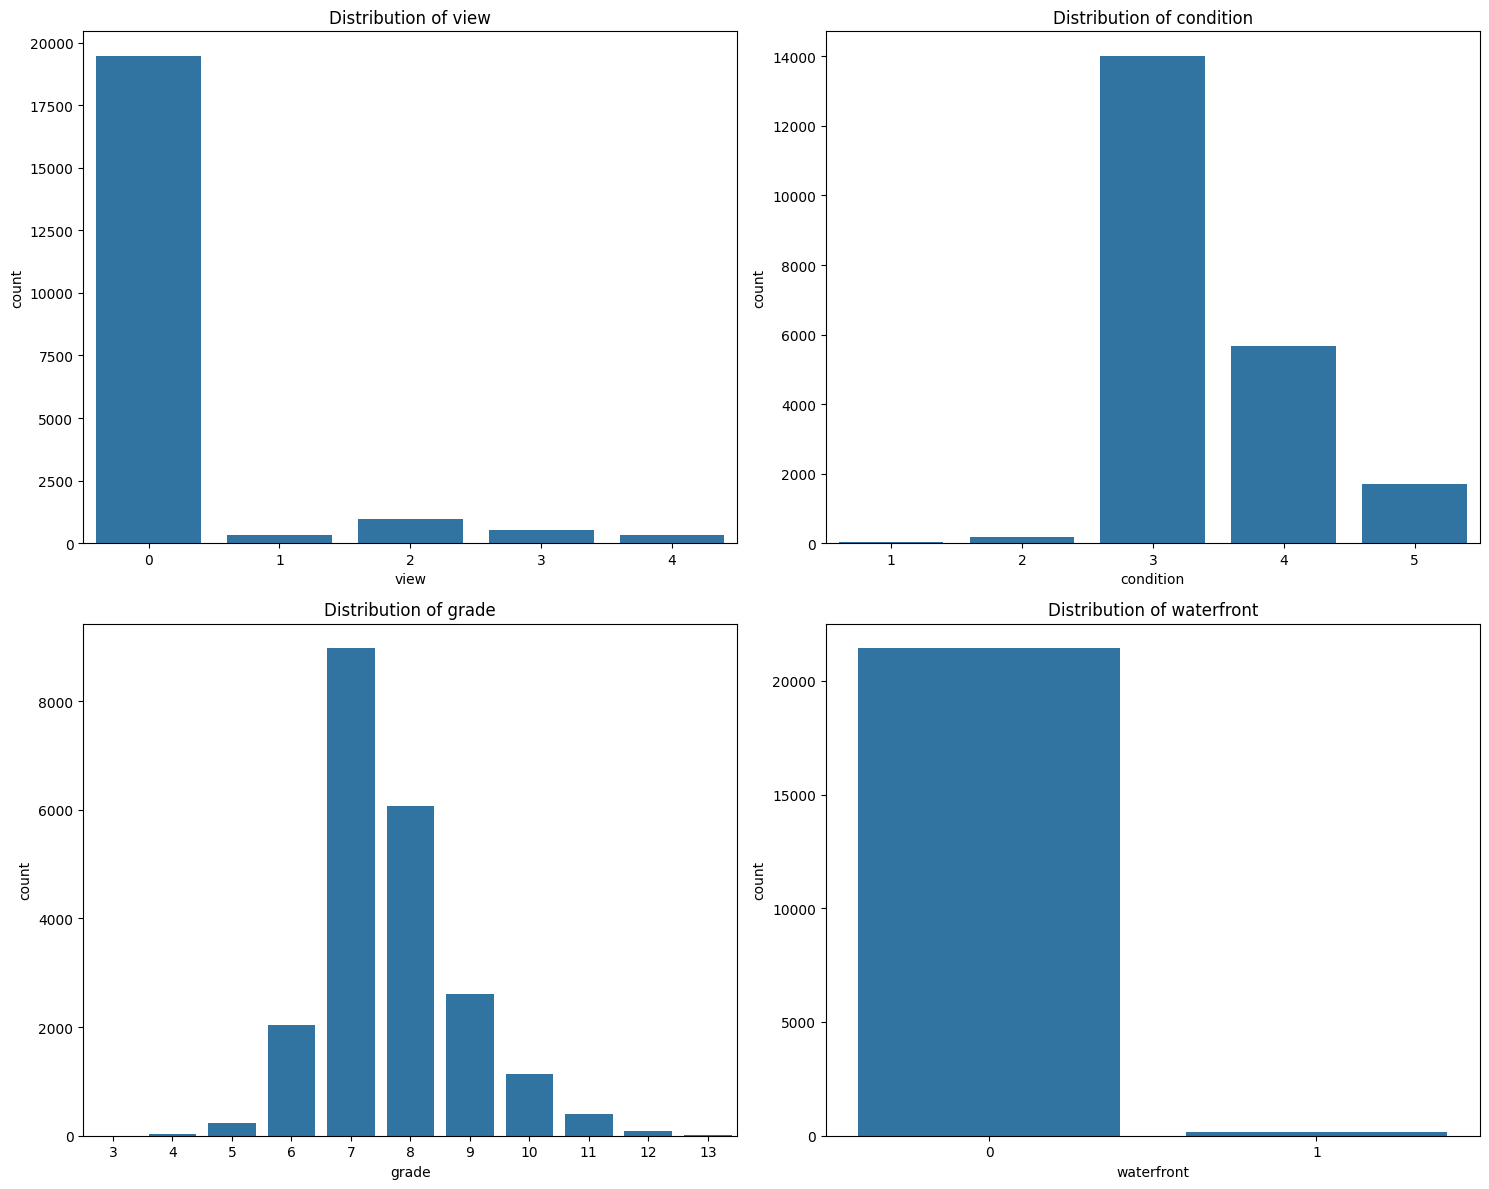

In [165]:
features = ['view', 'condition', 'grade', 'waterfront']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  

    sns.countplot(x=df[feature])
    plt.title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()


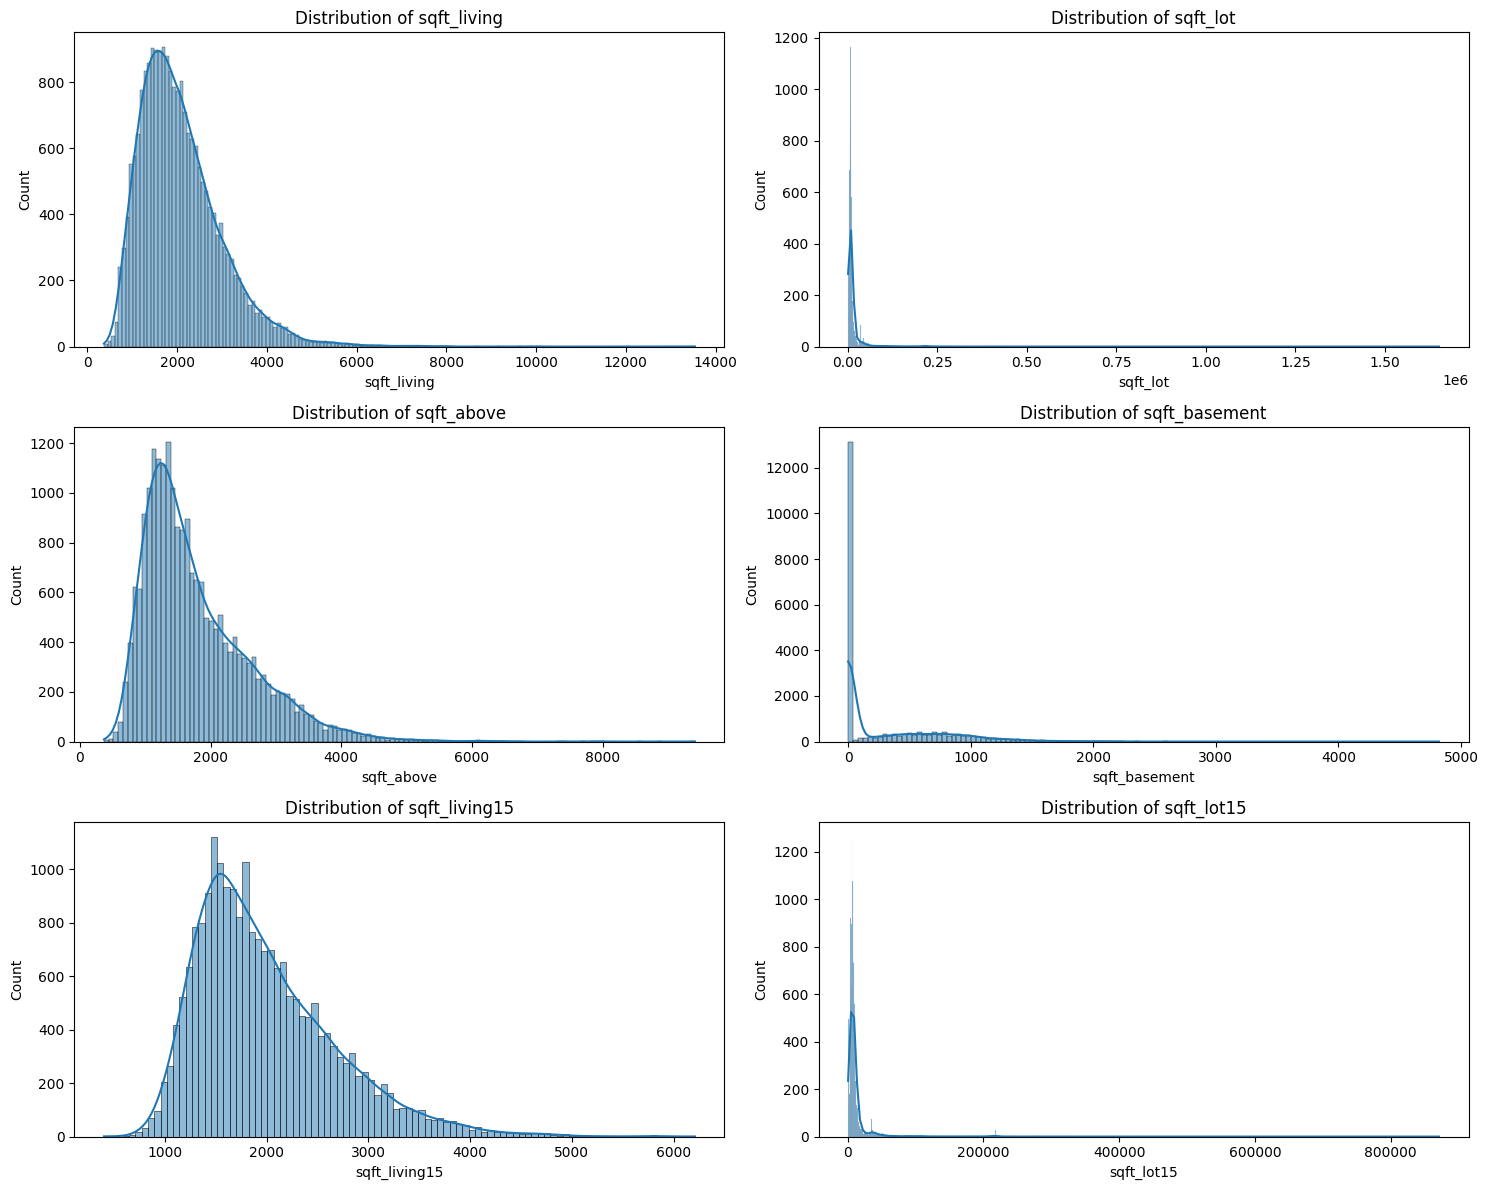

In [166]:
features = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

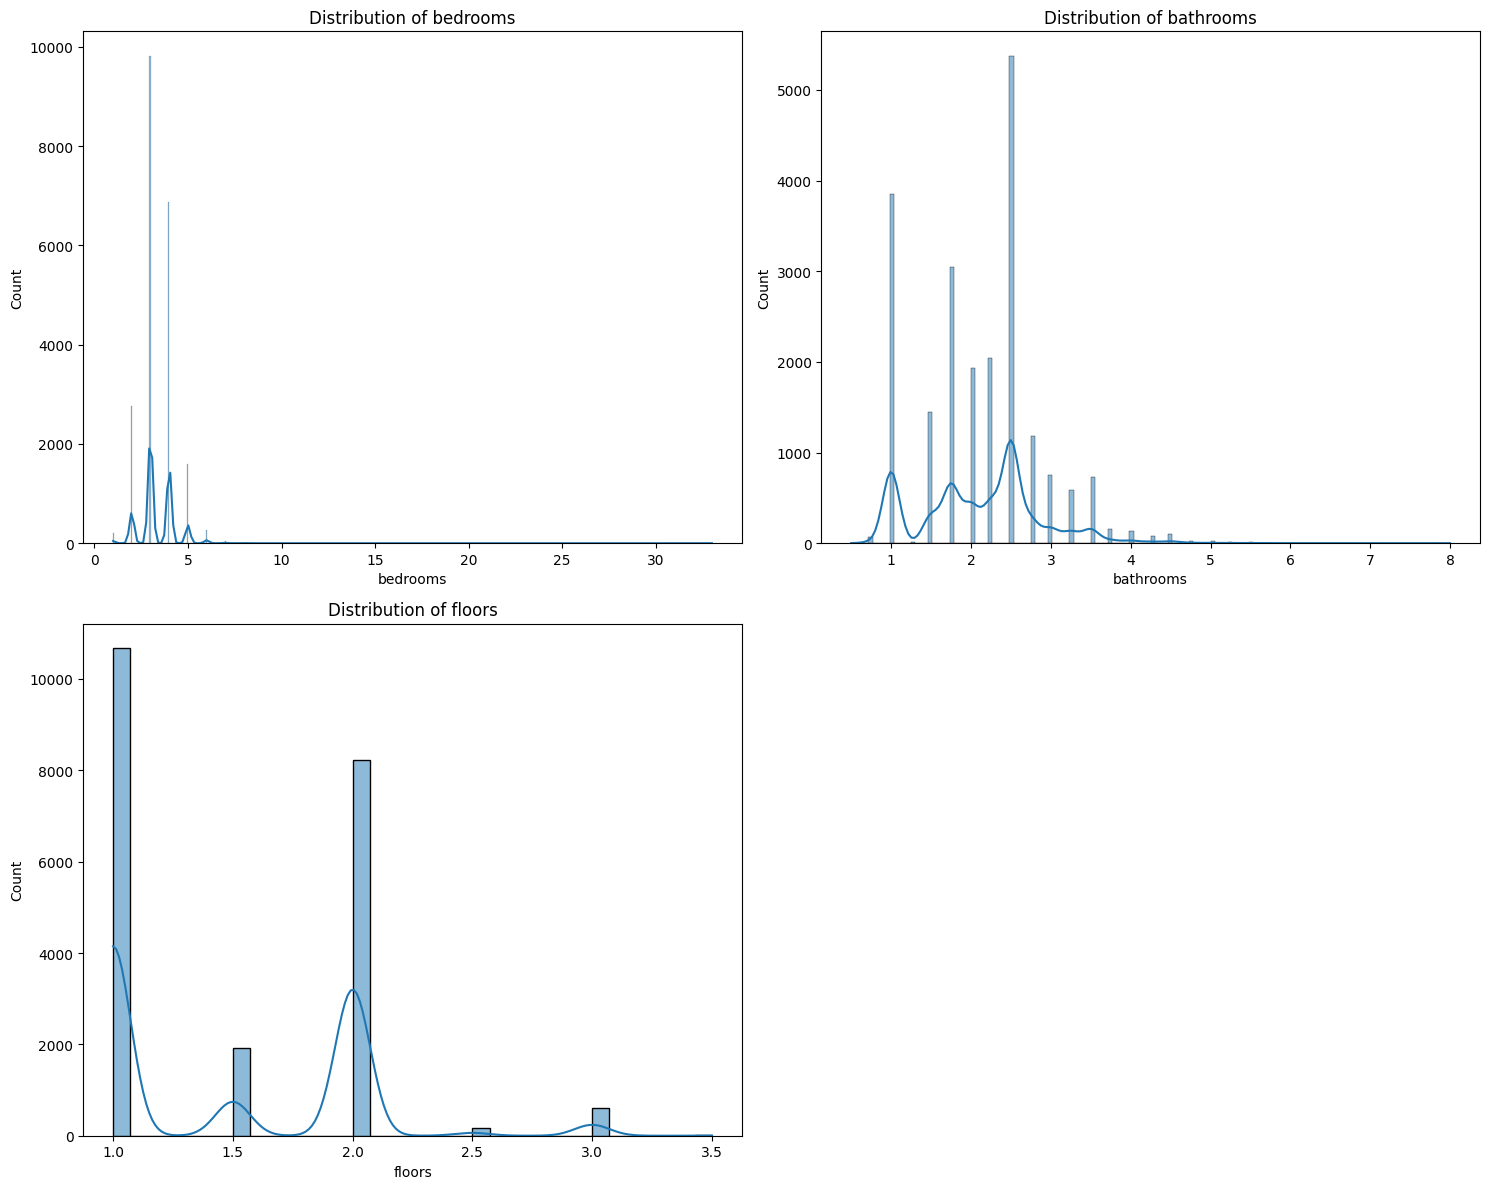

In [167]:
features = ['bedrooms', 'bathrooms', 'floors']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

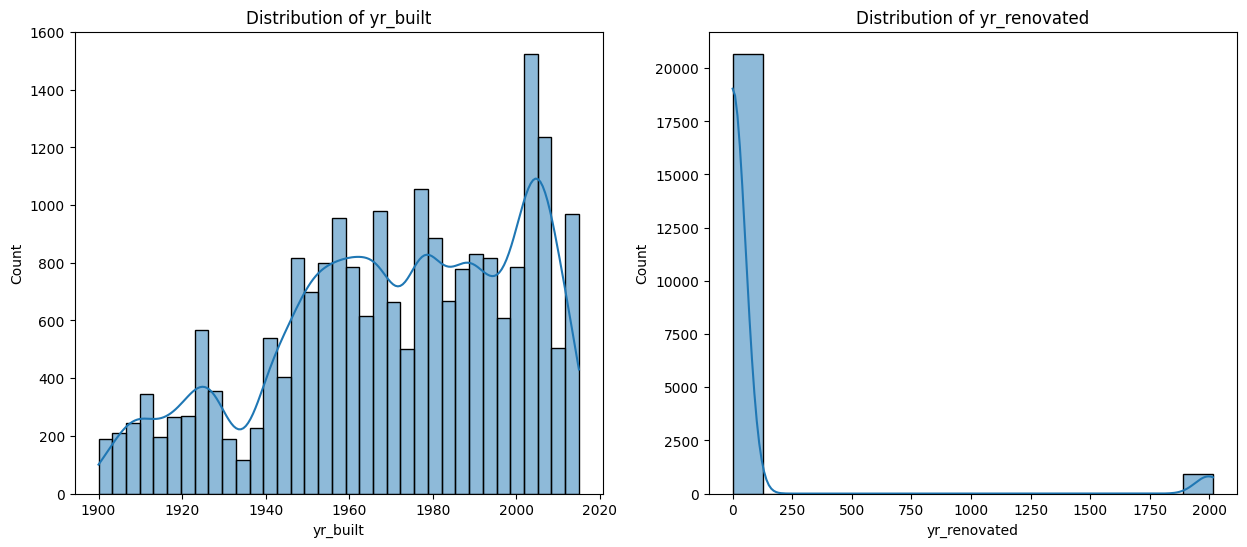

In [168]:
features = ['yr_built', 'yr_renovated']

plt.figure(figsize=(15, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i) 

    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    

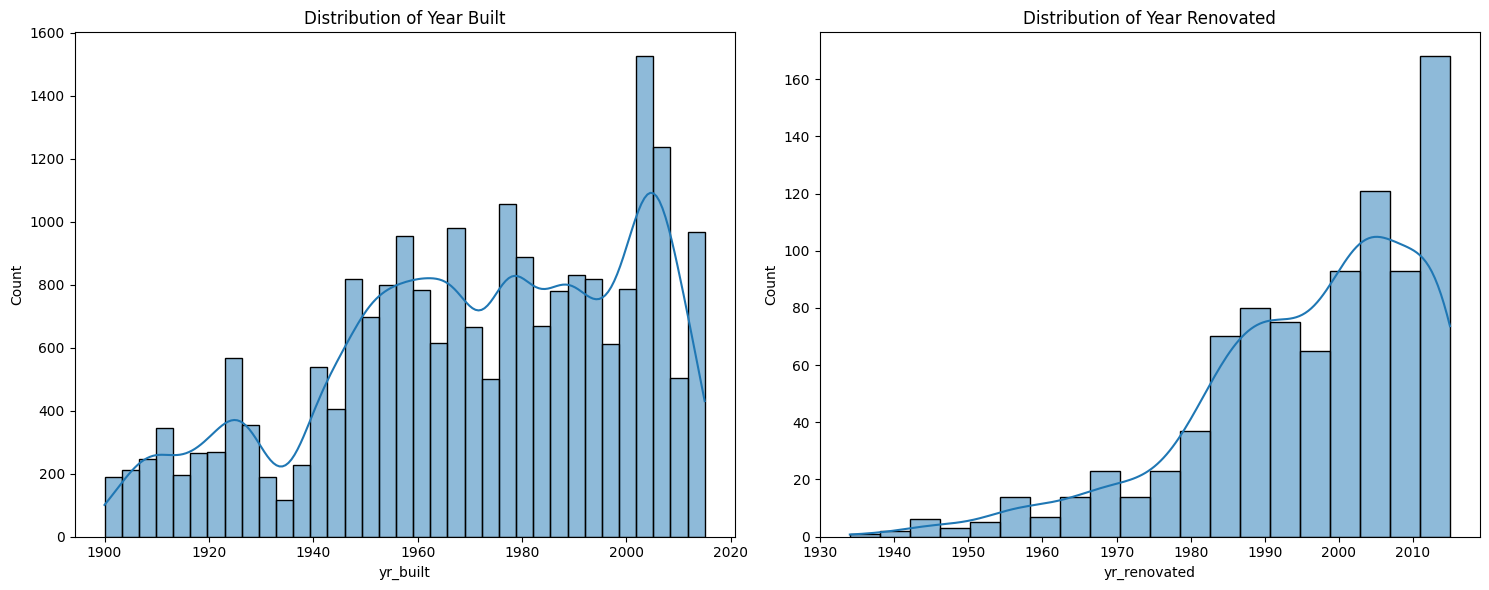

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['yr_built'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Year Built')

sns.histplot(df[df['yr_renovated'] > 0]['yr_renovated'], kde=True, ax=axes[1])  
axes[1].set_title('Distribution of Year Renovated')

plt.tight_layout()
plt.show()

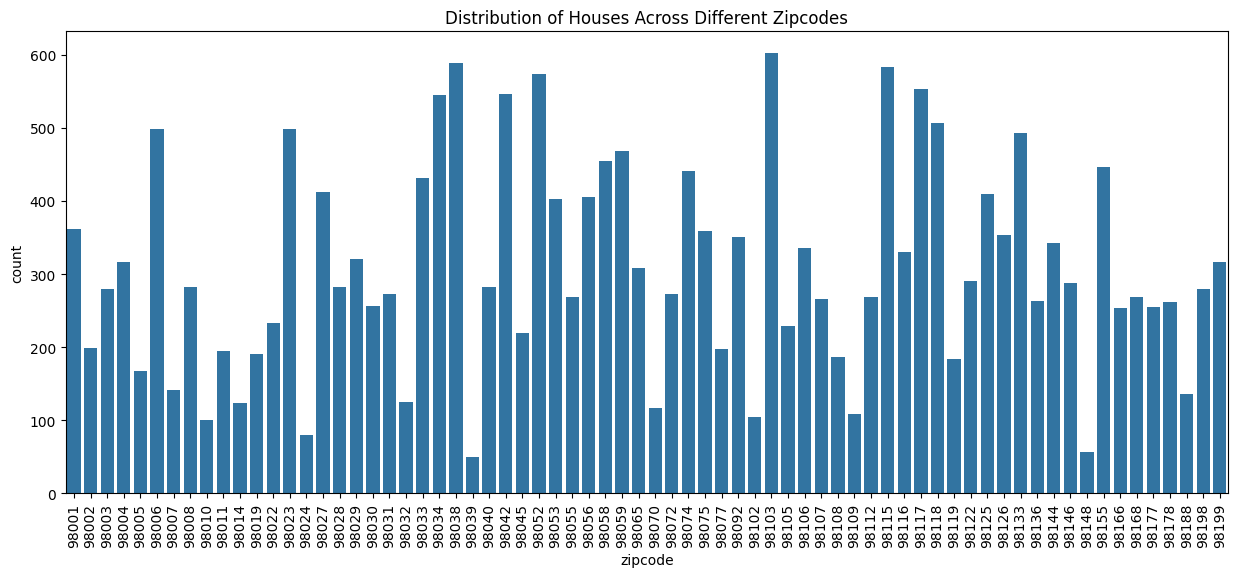

In [170]:
plt.figure(figsize=(15, 6))
sns.countplot(x='zipcode', data=df)
plt.title('Distribution of Houses Across Different Zipcodes')
plt.xticks(rotation=90)  
plt.show()


### 2.2 **Data Transformation**

2.1 Normalization

*Source: https://developers.google.com/machine-learning/data-prep/transform/normalization*

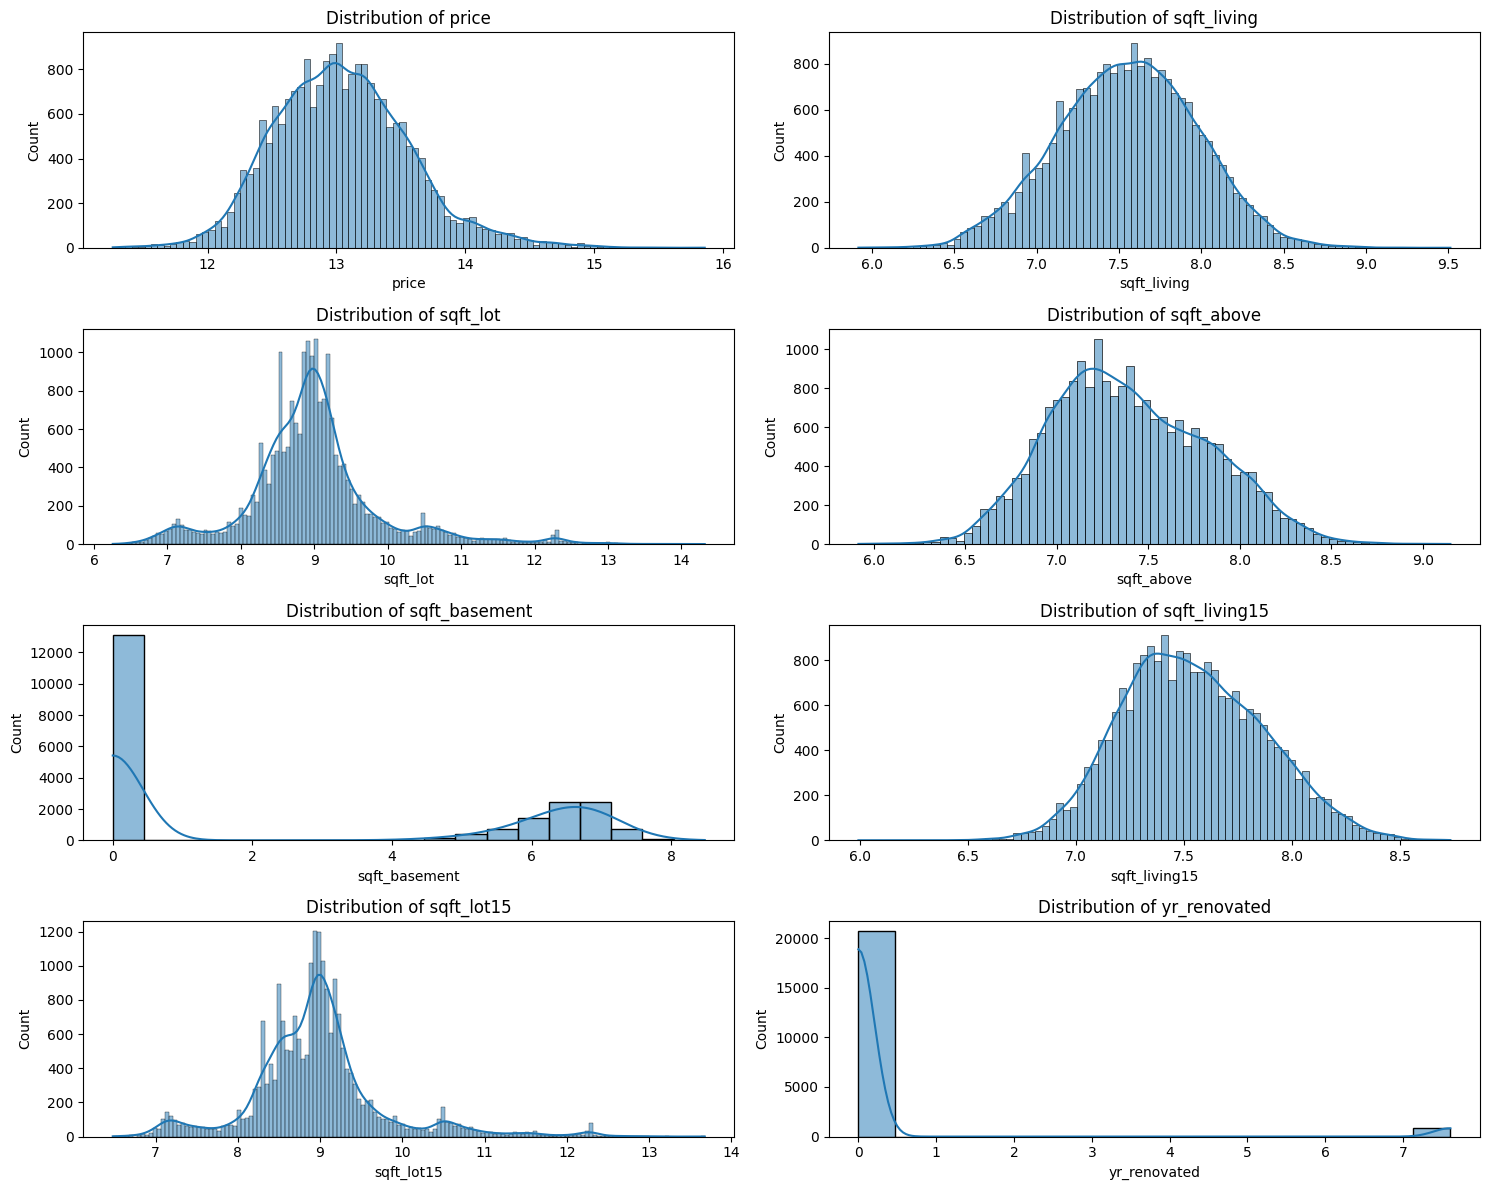

In [171]:
features = ['price', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_renovated']

for feature in features:
    df[feature] = np.log1p(df[feature])

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

#### **2.1 Feature Enginerring**

#TODO: Feature Enginerring Desc.

1. **Overall House Age - The total age of the house calculated from its construction year to the year of sale**
    - Possible Significance : Older homes might be valued less than newer ones due to their overall build and condition.
    <br></br>

2. **Relative House Age - The relative age of the house based off renovations if any. If there are no renovations the house age is its overall age**
    - Possible Significance : Recent renovations might enhance a house's perceived age and potentially increase its value.
    <br></br>

3. **Renovation Indicator - A binary indicator that reflects whether any renovation has occurred.**
   - Possible Signifiance : Renovated houses might be more attractive and valued higher than ones that are not.
    <br></br>

4. **Price Per Sqaure Foot Living - The price per square foot for the living area.**
5. **Price Per Square Foot Lot - The price per square foot for the living area.**
   - Possible Significance :  The value of a home is often estimated based on its price per square foot.
    <br></br>

6. **Bathroom-to-Bedroom - The ratio of bathrooms to bedrooms can indicate the level of comfort and convenience in a house.**
   - Possible Significance : A higher bathroom-to-bedroom ratio may signify convenience and a nicer house which may influence price
    <br></br>

In [172]:
# Calculate the age of the house based on the year it was built and the date it was sold
df['overall_house_age'] = df['date'].dt.year - df['yr_built']

# Calculate the age of renovation based on the year it was renovated and the date the house was sold
# If the house was never renovated set the renovation age to the the overall house age
df['relative_house_age'] = df['date'].dt.year - df['yr_renovated']
df.loc[df['yr_renovated'] == 0, 'relative_house_age'] = df['overall_house_age']

# Create a binary indicator to determine if the house was renovated or not
df['has_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# # Calculate the price per square foot for living space
# df['price_per_sqft_living'] = df['price'] / df['sqft_living']

# # Calculate the price per square foot for the lot
# df['price_per_sqft_lot'] = df['price'] / df['sqft_lot']

# Calculate the ratio of bathrooms to bedrooms
df['bath_bed_ratio'] = df['bathrooms'] / df['bedrooms']

# Edge Case : Handle some properties that have bathrooms without bedrooms in which results a 'inf' ratio 
df['bath_bed_ratio'] = df['bath_bed_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# TODO: Comeback and create some more unique features

df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,overall_house_age,relative_house_age,has_renovated,bath_bed_ratio
0,2014-10-13,12.309987,3,1.00,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.000000,1955,0.000000,98178,47.5112,-122.257,7.201171,8.639588,59,59.000000,0,0.333333
1,2014-12-09,13.195616,3,2.25,7.852050,8.887791,2.0,0,0,3,7,7.682943,5.993961,1951,7.596894,98125,47.7210,-122.319,7.433075,8.941153,63,2006.403106,1,0.750000
2,2015-02-25,12.100718,2,1.00,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.000000,1933,0.000000,98028,47.7379,-122.233,7.908755,8.995041,82,82.000000,0,0.500000
3,2014-12-09,13.311331,4,3.00,7.581210,8.517393,1.0,0,0,5,7,6.957497,6.814543,1965,0.000000,98136,47.5208,-122.393,7.215975,8.517393,49,49.000000,0,0.750000
4,2015-02-18,13.142168,3,2.00,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.000000,1987,0.000000,98074,47.6168,-122.045,7.496097,8.923191,28,28.000000,0,0.666667


In [173]:
# Double checking missing and infinite values

# Count missing values per column
missing_data = df.isnull().sum()

# Count infinite values per column (due to edge case)
inf_data = df.isin([np.inf, -np.inf]).sum()

# Combine counts of missing and infinite values
total_issues = missing_data + inf_data

# Display the combined counts
print(total_issues)


date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
overall_house_age     0
relative_house_age    0
has_renovated         0
bath_bed_ratio        0
dtype: int64


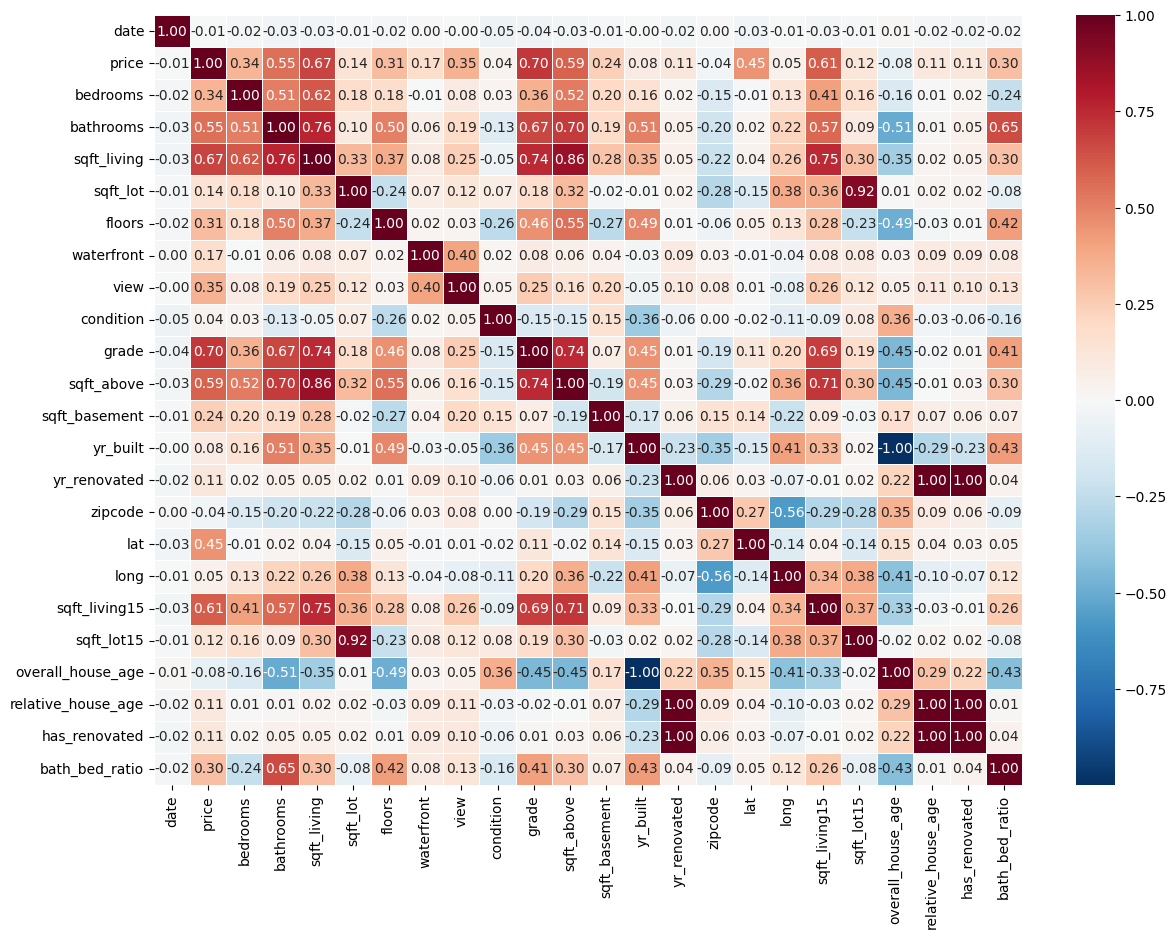

In [174]:
# Initialize the correlation matrix for the dataframe
corr = df.corr()

# Adjust the figure size
plt.figure(figsize=(14,10))

# Create a to visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap="RdBu_r", fmt=".2f", linewidth=0.5)

plt.show()

#### **2.2.3 More Feature Engineering (Location Specific)**

#### **2.2.4 Removing Redundant Features**


1. **Sqft_Above and Sqft_Basement**
    - Reasoning : We can remove there features as they are a subset of Sqft_living (total sqft of the house)
    <br></br>

2. **yr_renovated**
    - Reasoning : It is replaced with the binary indicator of if the house has been renovated
    <br></br>

3. **Renovation Indicator - A binary indicator that reflects whether any renovation has occurred.**
   - Possible Signifiance : Renovated houses might be more attractive and valued higher than ones that are not.
    <br></br>

In [175]:
# # Removing redundant features

# # Drop the 'sqft_above' column since it is highly correlated with 'sqft_living'
# df = df.drop(['sqft_above'], axis=1)

# # Drop the 'sqft_basement' column since it is highly correlated with 'sqft_living'
# df = df.drop(['sqft_basement'], axis=1)

# # Drop 'yr_renovated' since we have renovation indicator and 'relative_house_age'
# df = df.drop(['yr_renovated'], axis=1)

# # # Drop the 'date' column since we have relative and overall house age
df = df.drop(['date'], axis=1)

# # Drop the 'overall_house_age' column since there is more correlation with 'relative_house_age'
# df = df.drop(['overall_house_age'], axis=1)

# # Drop zipcode since we have zipcode features
# df = df.drop(['zipcode'], axis=1)

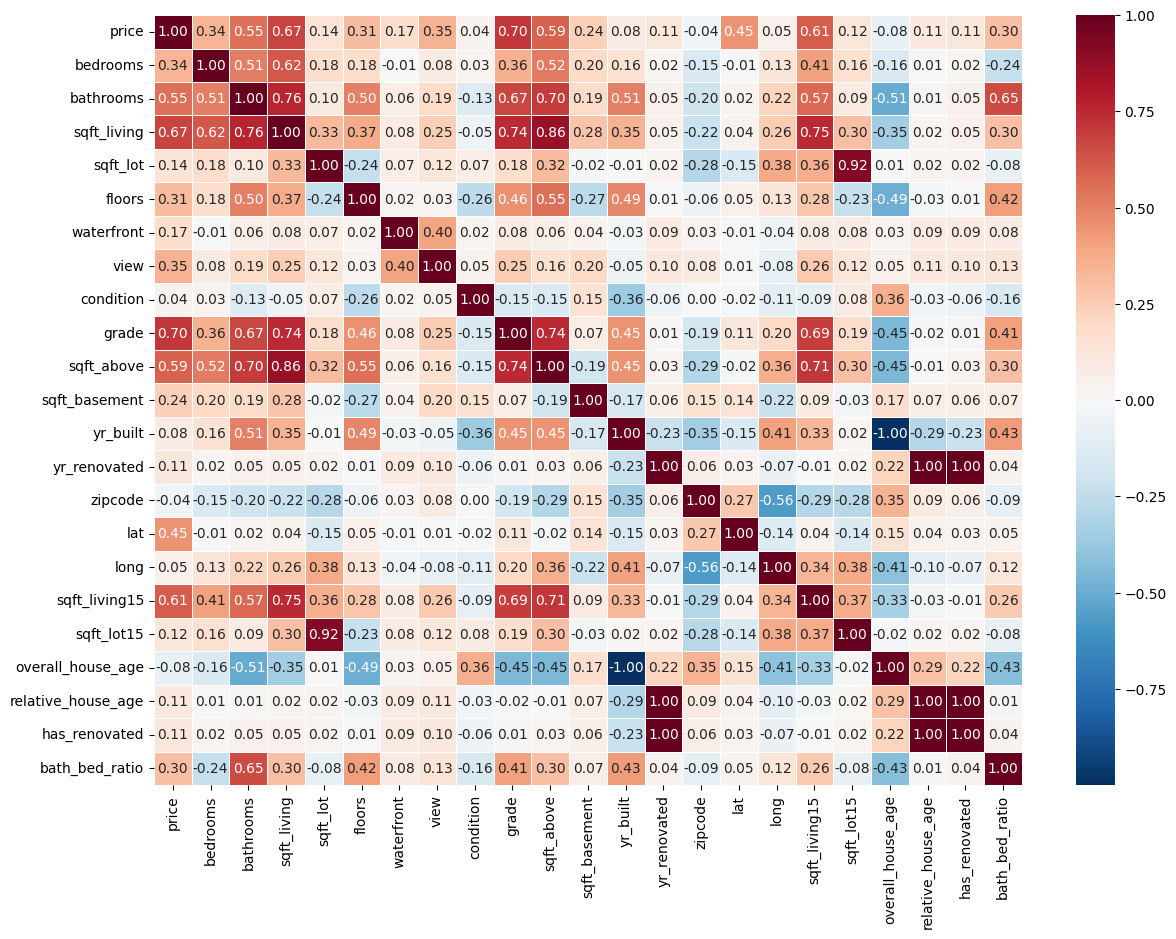

In [176]:
# Initialize the correlation matrix for the dataframe
corr = df.corr()

# Adjust the figure size
plt.figure(figsize=(14,10))

# Create a to visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap="RdBu_r", fmt=".2f", linewidth=0.5)

plt.show()

In [177]:
# Drop price since it is our target and drop date since LR process date time
features = df.columns.drop(['price'])

# Initialize dataframe with features
features = df[features]

# Initialize the target variable
target = df['price']

# Split the data into training and testing sets (80/20)
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data.
# In doing so the model will learn the relationship
lr_model.fit(feature_train, target_train)

# Use the trained model to make predictions on the test set.
target_pred = lr_model.predict(feature_test)

# Calculate the Mean Absolute Error (mae)
mae = mean_absolute_error(target_test, target_pred)

# Calculate the Mean Squared Error (mse)
mse = mean_squared_error(target_test, target_pred)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate the R-squared score.
r2 = r2_score(target_test, target_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Sqaure Error:", rmse)
print("R-squared score:", r2)

Mean Absolute Error: 0.19422848140312504
Mean Squared Error: 0.06367502474285154
Root Mean Sqaure Error: 0.25233910664590126
R-squared score: 0.7661064593141065
